In [1]:
# Import important Libraries

import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Data Transformation Libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Machine Learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

# DATA IMPORTATION AND PREPARATION


In [2]:
#import the entire data as provided for the project
df=pd.read_csv('appliancesload.csv')
df

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0


In [3]:

    #converting data to datetime
df["Time"]= pd.to_datetime(df["Time"], format = "%d/%m/%Y %H:%M")

    
    #Adding month, Day, Hour and Minutes to our df
   
df["Day"] = df["Time"].dt.day
df["Hour"] = df["Time"].dt.hour
df["Minutes"] = df["Time"].dt.minute
df["month"] = df["Time"].dt.month
df["Dayofweek"] = df["Time"].dt.dayofweek
df["Month_name"] = df["Time"].dt.month_name()
df["Dayofweek"] = df["Time"].dt.day_name()
    
     # splitting Time Column into date and time
df['date'] = [d.date() for d in df['Time']]
df['time'] = [d.time() for d in df['Time']]
    
    #lets convert "date"into  dtype
df["date"]= pd.to_datetime(df["date"], format = "%Y-%m-%d")
    
    #lets Convert "time" into dtype
df["time"]= pd.to_datetime(df["time"], format = "%H:%M:%S")
    
    # converting "dtype"
df["time"]= pd.to_datetime(df["time"], format = "%H:%M:%S")
    
    
    
   
   

In [4]:
 # extracting only year 2013 to work with in this project
df = df[df["Time"] <"2014"]
df = df.drop(["Time"], axis=1)  
    
    

In [5]:
#removing the Aggregate column from the table (no longer necessary)
df = df.drop(["Aggregate"], axis=1)
df

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Day,Hour,Minutes,month,Dayofweek,Month_name,date,time
0,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
1,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
2,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
3,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
4,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,1,5,0,0,0,0,0,0,0,26,16,7,12,Thursday,December,2013-12-26,1900-01-01 16:07:00
487247,1,5,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00
487248,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00
487249,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00


In [8]:
#comfirming that only year 2013 is in the New DataFrame we will check the head and tail of the table
df.head() #check the top of table


,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Day,Hour,Minutes,month,Dayofweek,Month_name,date,time
0,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
1,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
2,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
3,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00
4,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00


In [9]:
 #check the top of table
df.tail ()


,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Day,Hour,Minutes,month,Dayofweek,Month_name,date,time
487246,1,5,0,0,0,0,0,0,0,26,16,7,12,Thursday,December,2013-12-26,1900-01-01 16:07:00
487247,1,5,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00
487248,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00
487249,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00
487250,1,18,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00


In [4]:
#checking for missing data
df.isnull().sum()

Time               0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
dtype: int64

In [9]:
# checking df info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487251 entries, 0 to 487250
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Aggregate        487251 non-null  int64         
 1   Fridge-Freezer   487251 non-null  int64         
 2   Washing Machine  487251 non-null  int64         
 3   Dishwasher       487251 non-null  int64         
 4   Television Site  487251 non-null  int64         
 5   Microwave        487251 non-null  int64         
 6   Toaster          487251 non-null  int64         
 7   Hi-Fi            487251 non-null  int64         
 8   Kettle           487251 non-null  int64         
 9   Overhead Fan     487251 non-null  int64         
 10  Day              487251 non-null  int64         
 11  Hour             487251 non-null  int64         
 12  Minutes          487251 non-null  int64         
 13  Weekofyear       487251 non-null  int64         
 14  Dayofyear        487

In [10]:
# Checking data shape
df.shape

(487251, 17)

In [11]:
# Checking the descriptive statistics of the dataframe
df.describe()

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Day,Hour,Minutes,month
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638,16.814755,11.367552,29.549842,9.630847
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527,8.241081,6.959798,17.326864,0.498886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,15.000000,9.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,11.000000,30.000000,10.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,17.000000,45.000000,10.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000,30.000000,23.000000,59.000000,12.000000


# EXPLORATORY ANALYSIS OF DATASET#


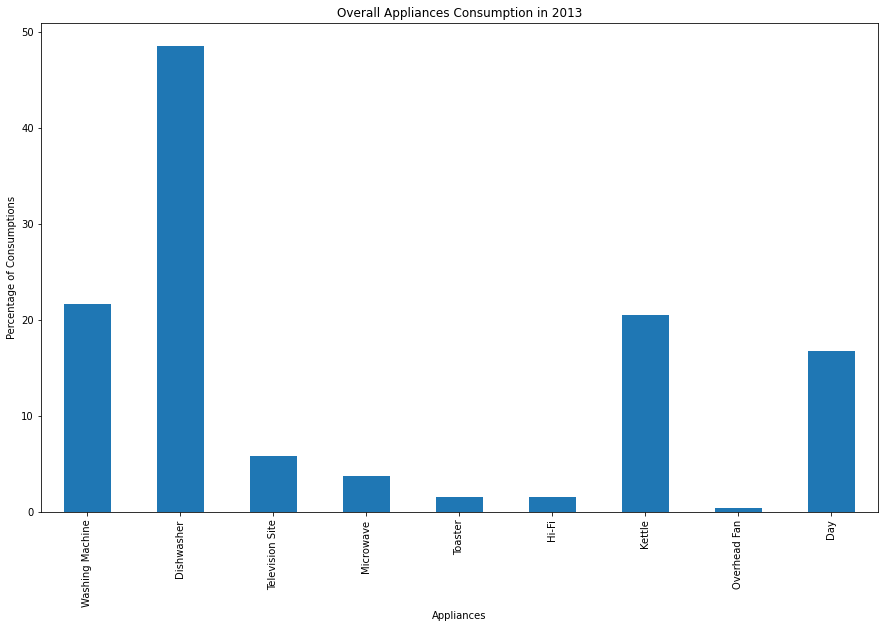

In [6]:
#lets check and represent the percentage consumption of all appliances across the dataset
variables = df.iloc[:, 1:10]

variables.mean().plot.bar(figsize=(15,9))
plt.ylabel('Percentage of Consumptions')
plt.xlabel('Appliances')
plt.title('Overall Appliances Consumption in 2013');

From the graphical representation as shown above it can be deduce that the appliance most used or with the highest percentage of usage in the year 2013 is dishwater and the lowest is  overhead fan. 


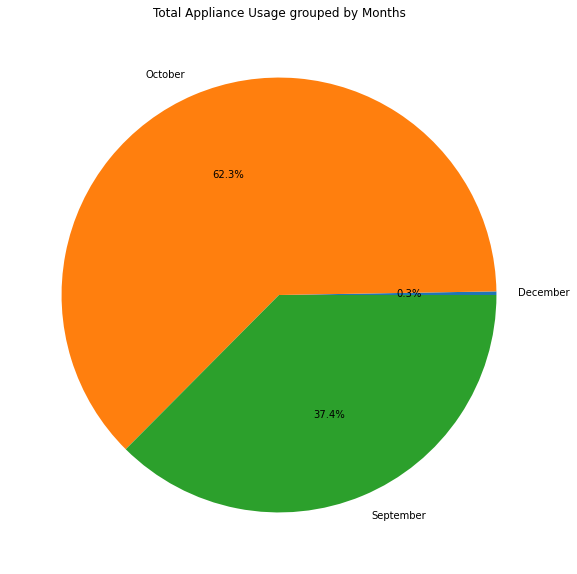

In [7]:
#Let us now represent consumption of appliances on monthly basis in graphical format
(
    df.groupby("Month_name").size()
    .plot(kind = 'pie', 
    subplots=True, 
    figsize=(10,10), 
    autopct='%1.1f%%')
)
plt.title("Total Appliance Usage grouped by Months")
plt.ylabel("")
plt.show;


from the pie chart it can be duduced that the month with the most appliance usage is october with percentage usage of 62.3% followed by september 37.4% and the lowest being december with 0.3%.

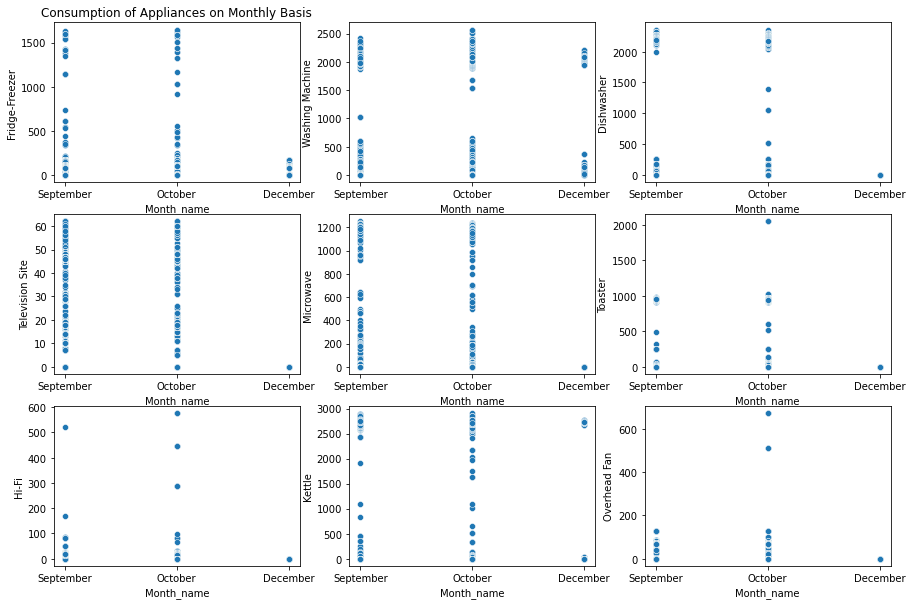

In [8]:
#Let us now represent consumption of appliances on monthly basis in graphical format
# using scatterplot
plt.figure(figsize = (15,10)) #size of plot
plt.subplot(3,3,1) #positioning subplots
sns.scatterplot(x=df['Month_name'], y=df['Fridge-Freezer'])
plt.title("Consumption of Appliances on Monthly Basis")
plt.subplot(3,3,2)
sns.scatterplot(x=df['Month_name'], y=df['Washing Machine'])
plt.subplot(3,3,3)
sns.scatterplot(x=df['Month_name'], y=df['Dishwasher'])
plt.subplot(3,3,4)
sns.scatterplot(x=df['Month_name'], y=df['Television Site'])
plt.subplot(3,3,5)
sns.scatterplot(x=df['Month_name'], y=df['Microwave'])
plt.subplot(3,3,6)
sns.scatterplot(x=df['Month_name'], y=df['Toaster'])
plt.subplot(3,3,7)
sns.scatterplot(x=df['Month_name'], y=df['Hi-Fi'])
plt.subplot(3,3,8)
sns.scatterplot(x=df['Month_name'], y=df['Kettle'])
plt.subplot(3,3,9)
sns.scatterplot(x=df['Month_name'], y=df['Overhead Fan'])
plt.show()

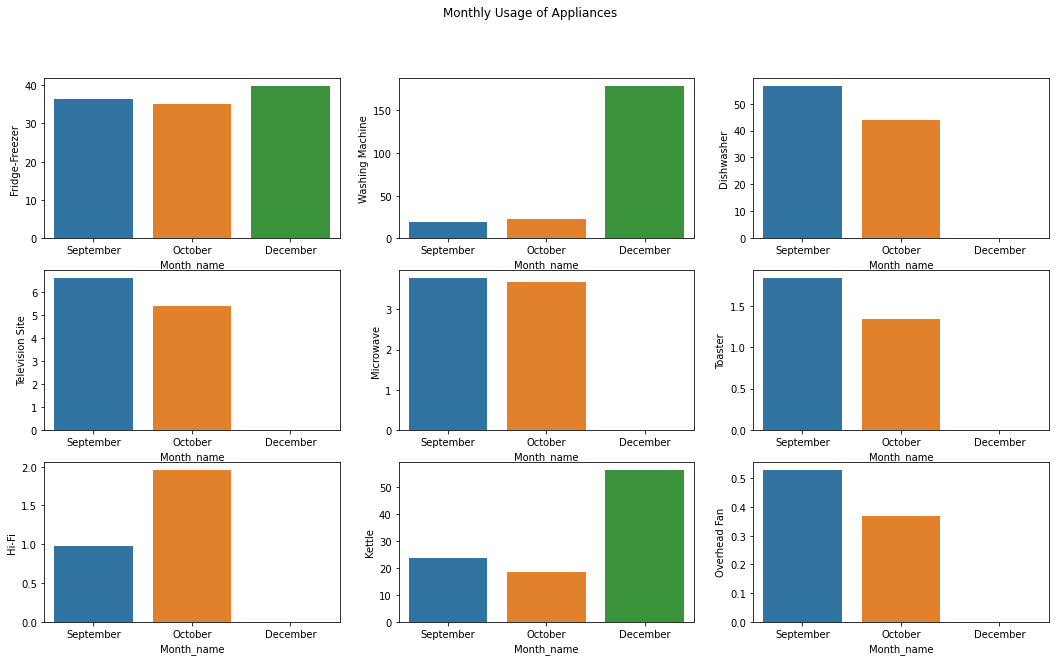

In [11]:
# MONTHLY CONSUMPTION PER APPLIANCE
# using Bar chart
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Monthly Usage of Appliances')

# Plotting the monthly consumption of "fridge freezer"
sns.barplot(ax=axes[0, 0],x="Month_name",y="Fridge-Freezer",data=df,ci=None );

# Plotting the monthly consumption of "Washing Machine"
sns.barplot(ax=axes[0, 1],x="Month_name",y="Washing Machine",data=df,ci=None );

# Plotting the monthly consumption of "Dishwasher"
sns.barplot(ax=axes[0, 2],x="Month_name",y="Dishwasher",data=df,ci=None );

# # Plotting the monthly consumption of "Television Site"
sns.barplot(ax=axes[1, 0],x="Month_name",y="Television Site",data=df,ci=None);

# Plotting the monthly consumption of "Microwave"
sns.barplot(ax=axes[1, 1],x="Month_name",y="Microwave",data=df,ci=None );

# Plotting the monthly consumption of "Toaster"
sns.barplot(ax=axes[1, 2],x="Month_name",y="Toaster",data=df,ci=None );

# Plotting the monthly consumption of "Hi-Fi"
sns.barplot(ax=axes[2, 0], x="Month_name",y="Hi-Fi",data=df,ci=None );

# Plotting the monthly consumption of "Kettle"
sns.barplot(ax=axes[2, 1],x="Month_name",y="Kettle",data=df,ci=None );

# Plotting the monthly consumption of "Overhead Fan"
sns.barplot(ax=axes[2, 2],x="Month_name",y= "Overhead Fan",data = df,ci=None);


using scatter plot and bar chart shows that appliance usage were mostly used in october and least used in december.

In [17]:
#let check and represent graphically which period of the day(Morning, Afternoon, Evening and Night) was each appliances used most
# lets define a function that will help to group each hours into there respective period of the day

def Hours_period(Hour):
    if Hour in [5,6,7,8,9,10,11]:
        period = 'Morning'
    elif Hour in range(12,18):
        period = 'Afternoon'
    elif Hour in range(18,22):
        period = 'Evening'
    else:
        period = 'Night'
    return period

#replace the Hour column with period of the day 
df['period']=df['Hour'].apply(Hours_period)
df

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Day,Hour,Minutes,month,Dayofweek,Month_name,date,time,period
0,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00,Night
1,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00,Night
2,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00,Night
3,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00,Night
4,88,0,0,0,0,0,0,0,0,17,22,8,9,Tuesday,September,2013-09-17,1900-01-01 22:08:00,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,1,5,0,0,0,0,0,0,0,26,16,7,12,Thursday,December,2013-12-26,1900-01-01 16:07:00,Afternoon
487247,1,5,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00,Afternoon
487248,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00,Afternoon
487249,1,25,0,0,0,0,0,0,0,26,16,8,12,Thursday,December,2013-12-26,1900-01-01 16:08:00,Afternoon


<AxesSubplot:xlabel='Month_name', ylabel='Overhead Fan'>

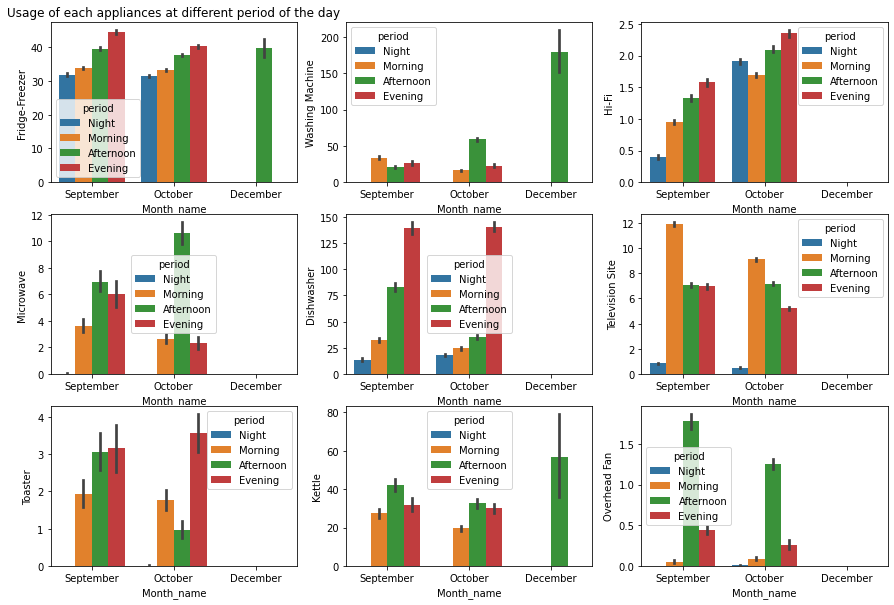

In [18]:
#lets check and represent graphically the usage of each appliances at different period of the day

plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.barplot(x=df['Month_name'], y=df['Fridge-Freezer'], hue = df['period'])
plt.title("Usage of each appliances at different period of the day")
plt.subplot(3,3,2)
sns.barplot(x=df['Month_name'], y=df['Washing Machine'], hue = df['period'])
plt.subplot(3,3,3)
sns.barplot(x=df['Month_name'], y=df['Hi-Fi'], hue = df['period'])
plt.subplot(3,3,4)
sns.barplot(x=df['Month_name'], y=df['Microwave'], hue = df['period'])
plt.subplot(3,3,5)
sns.barplot(x=df['Month_name'], y=df['Dishwasher'], hue = df['period'])
plt.subplot(3,3,6)
sns.barplot(x=df['Month_name'], y=df['Television Site'], hue = df['period'])
plt.subplot(3,3,7)
sns.barplot(x=df['Month_name'], y=df['Toaster'], hue = df['period'])
plt.subplot(3,3,8)
sns.barplot(x=df['Month_name'], y=df['Kettle'], hue = df['period'])
plt.subplot(3,3,9)
sns.barplot(x=df['Month_name'], y=df['Overhead Fan'], hue = df['period'])



# DAILY CONSUMPTION OF EACH APPLIANCES PER MONTH

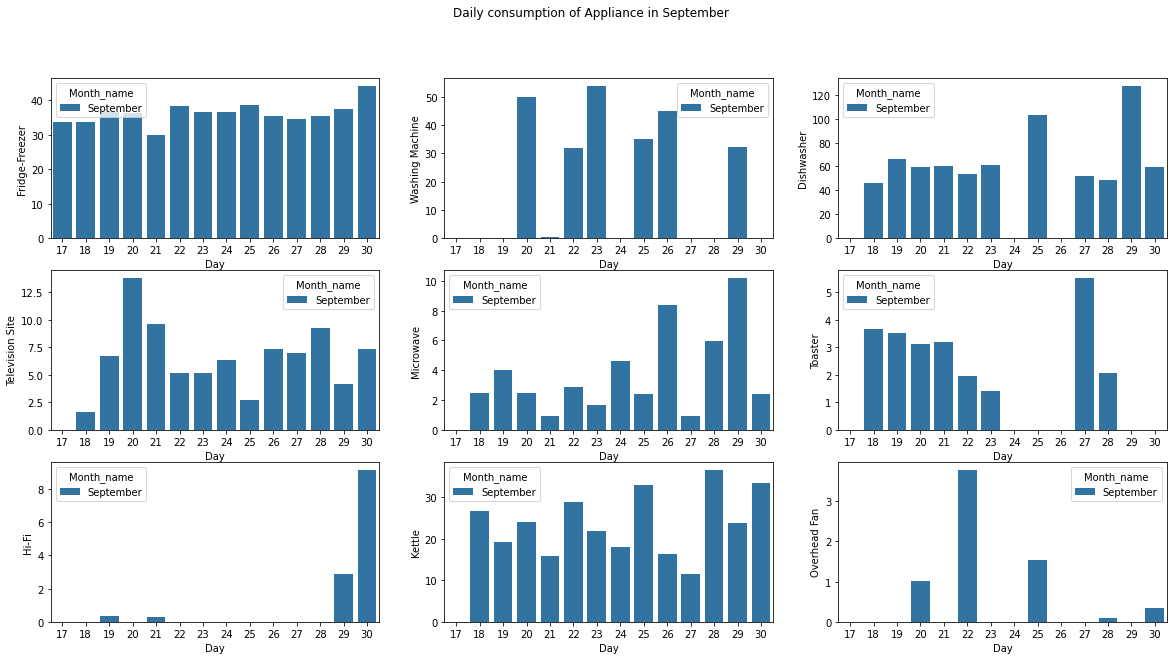

In [15]:
#lets check and represent graphically daily consumption of each appliances in the month of september

septber = df[df["Month_name"] == "September"]
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Daily consumption of Appliance in September')

# Plotting the monthly consumption of "fridge freezer"
# Daily Usage of "Fridge Freezer in September"
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Washing Machine" in September
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Dishwasher" in September
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Television Site" in September
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Microwave" in September
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Toaster" in September
sns.barplot(ax=axes[1, 2], x="Day",y="Toaster",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Hi-Fi" in September
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Kettle" in September
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=septber,ci=None);

# Daily Usage of "Overhead Fan" in September
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=septber,ci=None);

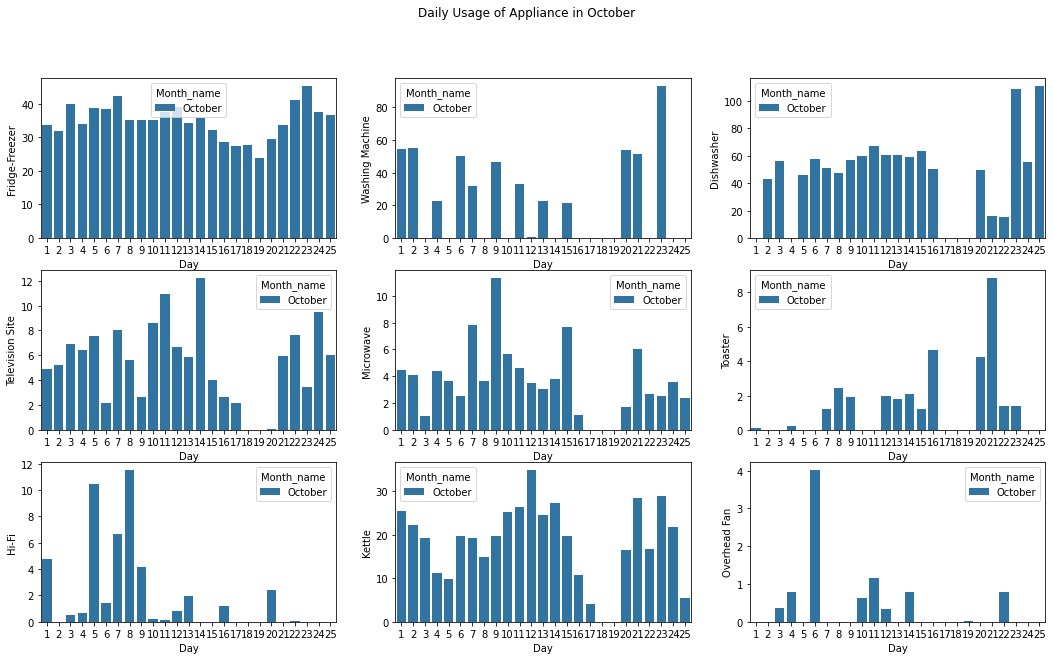

In [13]:
# lets check and represent graphically daily consumption of each appliances in the month of october
oct = df[df["Month_name"] == "October"]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Daily Usage of Appliance in October')

# Daily Usage of "Fridge Freezer in October
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Washing Machine" in October
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Dishwasher" in October
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Television Site" in October
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Microwave" in October
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Toaster" in October
sns.barplot(ax=axes[1, 2], x="Day",y="Toaster",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Hi-Fi" in October
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=oct,ci=None);

# Daily Usage of "Kettle" in October
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=oct, ci=None);

# Daily Usage of "Overhead Fan" in October
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=oct,ci=None);

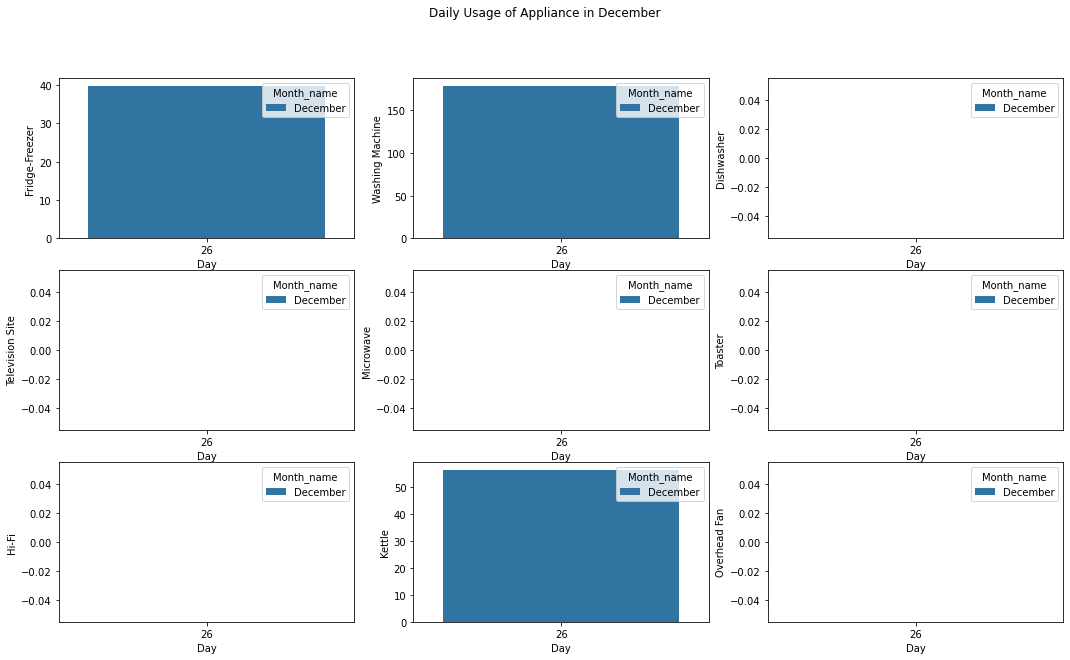

In [14]:
# lets check and represent graphically daily consumption of each appliances in the month of december
dec = df[df["Month_name"] == "December"]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Daily Usage of Appliance in December')


# Daily Usage of "Fridge Freezer in December
sns.barplot(ax=axes[0, 0], x="Day",y="Fridge-Freezer",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Washing Machine" in December
sns.barplot(ax=axes[0, 1], x="Day",y="Washing Machine",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Dishwasher" in December
sns.barplot(ax=axes[0, 2], x="Day",y="Dishwasher",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Television Site" in December
sns.barplot(ax=axes[1, 0], x="Day",y="Television Site",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Microwave" in December
sns.barplot(ax=axes[1, 1], x="Day",y="Microwave",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Toaster" in December
sns.barplot(ax=axes[1, 2], x="Day",y="Toaster",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Hi-Fi" in December
sns.barplot(ax=axes[2, 0], x="Day",y="Hi-Fi",hue="Month_name",data=dec,ci=None);

# Daily Usage of "Kettle" in December
sns.barplot(ax=axes[2, 1], x="Day",y="Kettle",hue="Month_name",data=dec, ci=None);

# Daily Usage of "Overhead Fan" in December
sns.barplot(ax=axes[2, 2], x="Day",y="Overhead Fan",hue="Month_name",data=dec,ci=None);

The graphical representation of daily consumption of each appliances on monthly basis futher justify that the month with the highest appliances usage falls within the month of october and the least usage falls in the month of december with usage basiclly on the day 26th.

# Lets Explore Appliances Usage Across Each Eonth on Weekly Bases


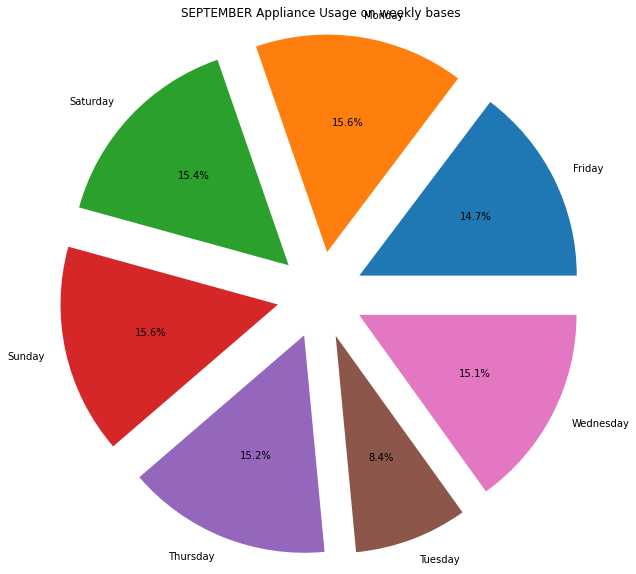

In [25]:
# SEPTEMBER  Appliance Usage on weekly bases
myexplode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

(
    septber.groupby(["Dayofweek"]).size()
    .plot(kind = 'pie', explode = myexplode,
          subplots=True, 
          figsize=(10,10), 
          autopct='%1.1f%%')
)
plt.title("SEPTEMBER Appliance Usage on weekly bases")
plt.ylabel("")
plt.show;


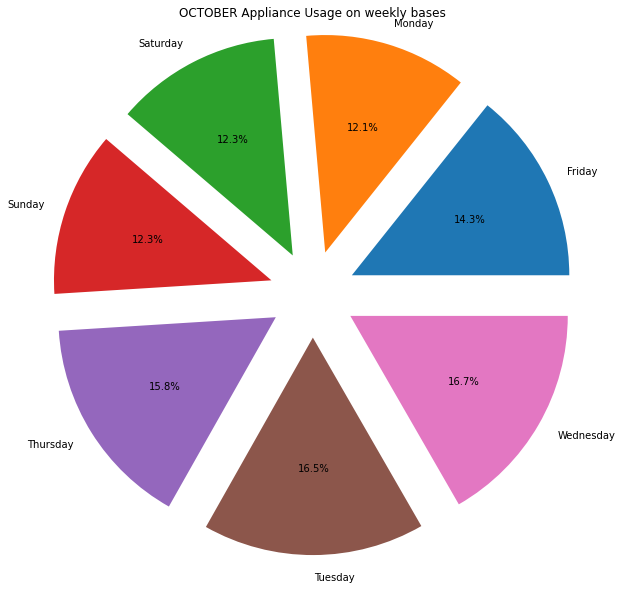

In [26]:
 #OCTOBER  appliance Usage on weekly bases

(
    oct.groupby(["Dayofweek"]).size()
    .plot(kind = 'pie', explode = myexplode,
          subplots=True, 
          figsize=(10,10), 
          autopct='%1.1f%%')
)
plt.title("OCTOBER Appliance Usage on weekly bases")
plt.ylabel("")
plt.show;


In all these analyses, Dishwasher appears to be the most used appliances in October, with Fridge Freezer, Washing Machine and Kettle coming next as most-frequently-used appliances.

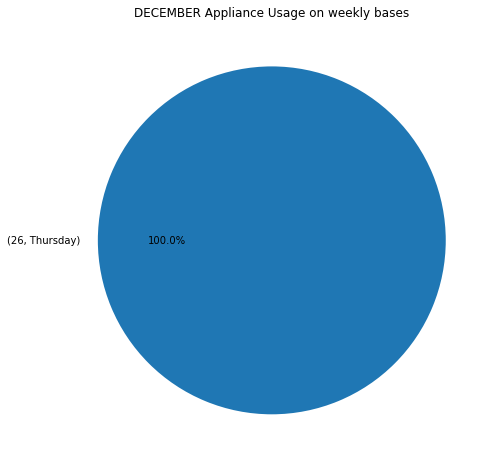

In [30]:
# DECEMBER Appliance Usage on weekly bases

(
    dec.groupby(["Day", "Dayofweek"]).size()
    .plot(kind = 'pie', 
          subplots=True, 
          figsize=(8,8), 
          autopct='%1.1f%%')
)
plt.title("DECEMBER Appliance Usage on weekly bases")
plt.ylabel("")
plt.show;

December only has one day of usage (26th, Thursday). Washing Machine, Kettle and FridgeFreezer appear as the most used appliances on this day. 

#                      DETECTING OUTLIERS

In [28]:
#Function for outliers
def plotoutlier(df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha = 0.5)
    plt.title(variable + " Outlier")
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


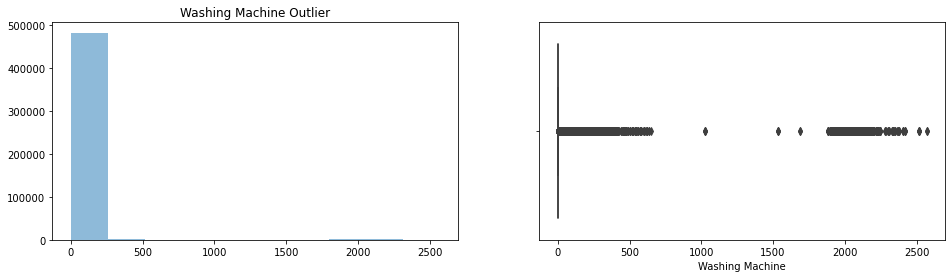

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


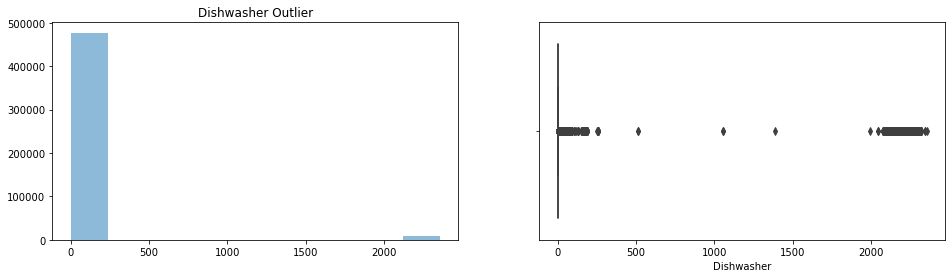

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


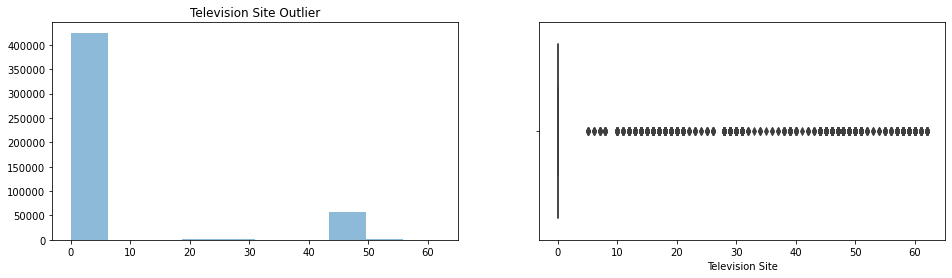

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


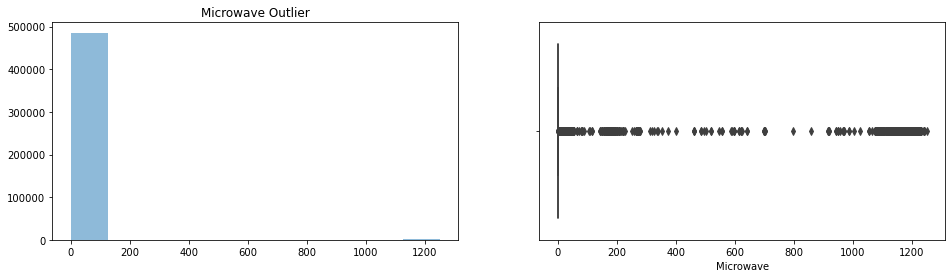

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


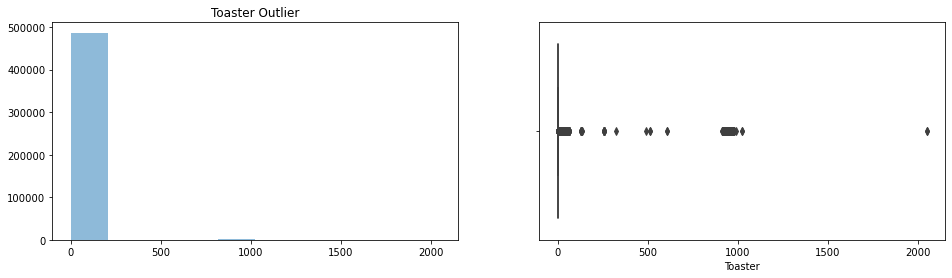

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


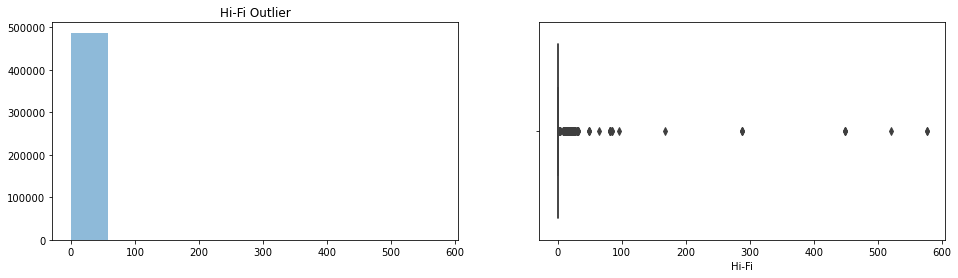

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


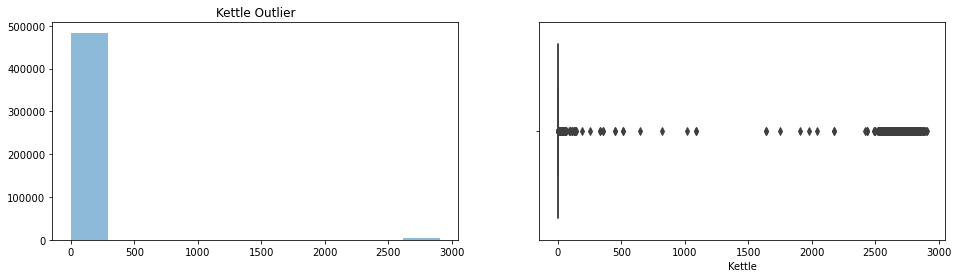

In [38]:

plotoutlier(df, "Washing Machine")
plotoutlier(df, "Dishwasher")
plotoutlier(df, "Television Site")
plotoutlier(df, "Microwave")
plotoutlier(df, "Toaster")
plotoutlier(df, "Hi-Fi")
plotoutlier(df, "Kettle")




#It can be deduced that it has a lot of outliers from the second plot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


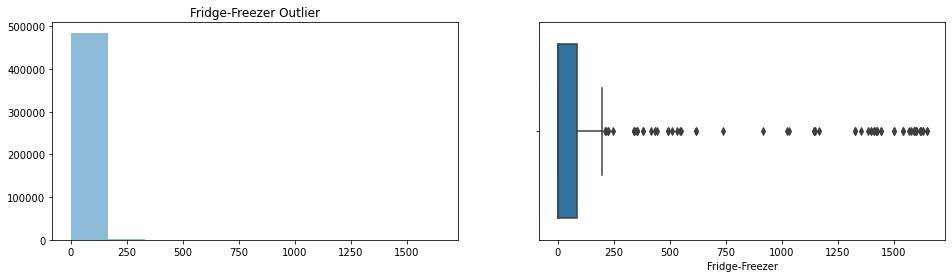

In [29]:
plotoutlier(df, "Fridge-Freezer")

In [30]:
#It can be deduced that it has a lot of outliers from the second plot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


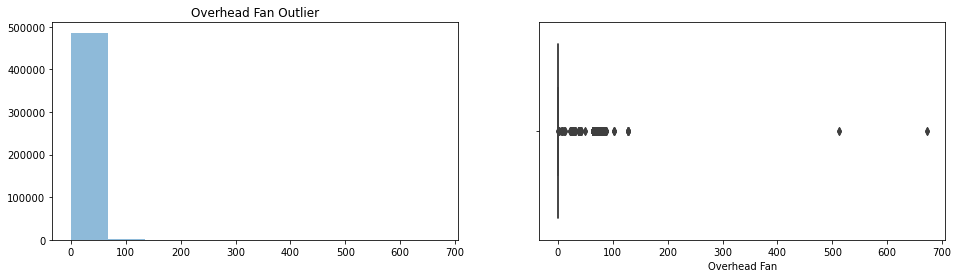

In [33]:
plotoutlier(df, "Overhead Fan")

#It can be deduced that it has a lot of outliers from the second plot.

# Overhead Fan shall be studied for outliers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overhead Fan'>

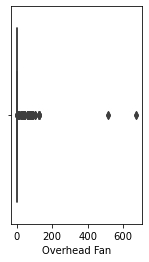

In [31]:
#Let's make a boxplot for Overhead variable to visualize outliers:
plt.figure(figsize = (8,4))
plt.subplot(1,3,1)
sns.boxplot(df['Overhead Fan'])

In [32]:
#Function for capping variables at upper and lower limits using the inter-quartile range proximity rule:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [34]:
#let's use the function to determine the limits of the overhead fan variable:
Fan_upper_boundary, Fan_lower_boundary = find_boundaries(df, 'Overhead Fan', 1.5)
Fan_upper_boundary, F_lower_boundary

(0.0, 0.0)

In [35]:
#lets create a Boolean vector to flag the outliers in Overhead Fan:
outliers_Fan = np.where(df['Overhead Fan'] > Fan_upper_boundary, True, 
                    np.where(df['Overhead Fan'] < Fan_lower_boundary, True, 
                    False))
outliers_Fan

array([False, False, False, ..., False, False, False])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Overhead Fan'>

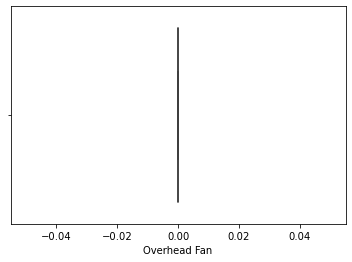

In [37]:
#lets remove the outliers from the dataset:
Fan_trimmed = df.loc[~(outliers_Fan)]
sns.boxplot(Fan_trimmed['Overhead Fan'])

# Building a machine learning predictive model to predict       electricity use from Overhead Fan

In [38]:
#CREATING A NEW DATAFRAME TO BUILD OUR MODEL FOR OVERHEAD FAN

In [47]:
df1 = df[['Minutes','Hour',  'Day','month', 'Overhead Fan']]
#DROP ALL ROWS WHERE USAGE IS = O
df1 = df1[df1["Overhead Fan"]!= 0]
df1.head()

,Minutes,Hour,Day,month,Overhead Fan
35325,23,11,20,9,87
35326,23,11,20,9,87
35327,23,11,20,9,86
35328,23,11,20,9,86
35329,23,11,20,9,86


In [42]:
#DATA SPLITTING 
#SET UP TRAIN, VALIDATION AND TEST DATA

In [48]:
def create_split_features(df1, target_variable):
    
    X = df1[['Minutes','Hour', 'Day', 'month']]
    
    if target_variable:
        y = df1[target_variable]
    
    # split the data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [49]:
X_train, X_valid, y_train, y_valid = create_split_features(df,target_variable="Overhead Fan")

In [50]:
X_train.head()

,Minutes,Hour,Day,month
294544,21,15,9,10
297967,47,21,9,10
141219,55,1,28,9
353645,8,11,14,10
386141,58,3,17,10


In [51]:
X_valid.head()

,Minutes,Hour,Day,month
31476,56,4,20,9
178334,48,16,30,9
463609,6,15,23,10
469674,10,3,24,10
42956,16,0,21,9


In [52]:
y_train.head()

294544    0
297967    0
141219    0
353645    0
386141    0
Name: Overhead Fan, dtype: int64

In [53]:
y_valid.head()

31476     0
178334    0
463609    0
469674    0
42956     0
Name: Overhead Fan, dtype: int64

In [54]:
# Split data again 
#the original data will be splitted into training/validation/test sets in a 70:20:10 ratio.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)

In [55]:
print("TRAIN SET:", len(X_train), "VALIDATION SET:", len(X_valid), "TEST SET:", len(X_test))

TRAIN SET: 341075 VALIDATION SET: 97451 TEST SET: 48725


In [57]:
y_train

267330    0
404411    0
58707     0
222749    0
173051    0
         ..
87809     0
303691    0
18202     0
224455    0
103103    0
Name: Overhead Fan, Length: 341075, dtype: int64

# Applying RobustScaler on X_train and X_test

In [58]:
scaler = RobustScaler()
scaler.fit(X_train)
#Let's fit the scalers to the train set
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [59]:
#Convert the NumPy arrays into dataframes just to use for correlation analysis:
variables = ['Minutes','Hour', 'Day', 'month']
X_train_scaled = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = variables)

In [60]:
X_train_scaled .head()

,Minutes,Hour,Day,month
0,-1.000000,-0.083333,-0.923077,0.0
1,-0.200000,0.416667,-0.076923,0.0
2,0.833333,-0.750000,0.230769,-1.0
3,0.266667,0.916667,-1.230769,0.0
4,0.933333,-0.333333,0.846154,-1.0


In [61]:
X_test_scaled .head()

,Minutes,Hour,Day,month
0,-0.266667,-0.916667,0.461538,-1.0
1,-0.400000,-0.916667,-0.692308,0.0
2,-0.633333,-0.916667,0.461538,0.0
3,0.800000,-0.250000,0.230769,-1.0
4,0.900000,-0.583333,0.000000,-1.0


In [62]:
X_valid_scaled .head()

,Minutes,Hour,Day,month
0,0.866667,-0.583333,0.076923,-1.0
1,0.600000,0.416667,0.846154,-1.0
2,-0.800000,0.333333,0.307692,0.0
3,-0.666667,-0.666667,0.384615,0.0
4,-0.466667,-0.916667,0.153846,-1.0


# FEATURES CORRELATION

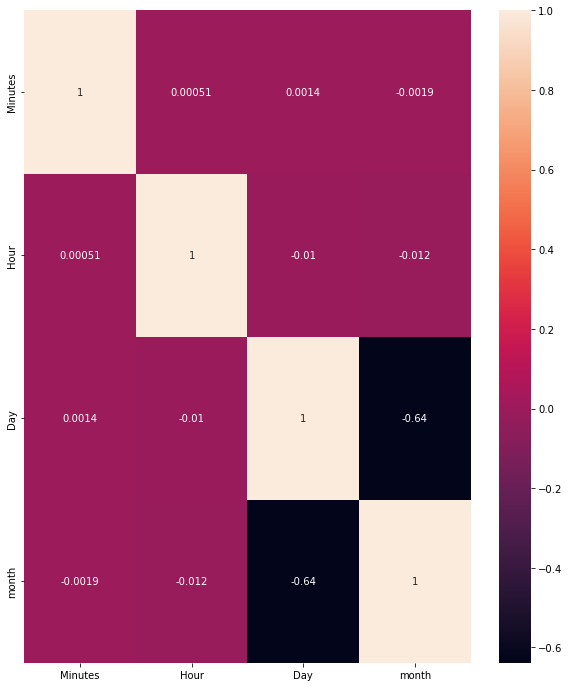

In [63]:
# Create a correlation matrix for the dataframe
corr = X_train_scaled.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(corr, annot = True);

In [65]:
# define the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

month     -0.411138
Day       -0.296226
Minutes   -0.173685
Hour       0.498760
dtype: float64


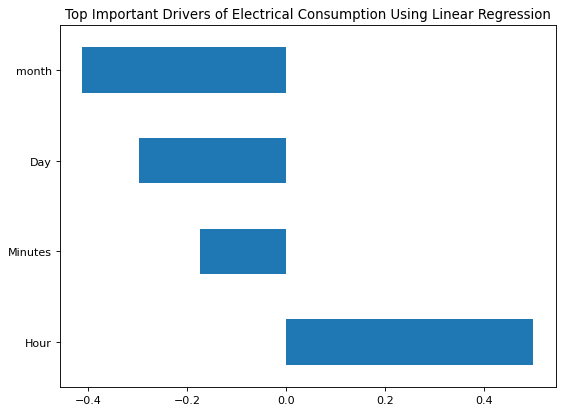

In [68]:
# define the model
model = LinearRegression()
# fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled, y_valid)
# get importance
importance = model.coef_
# summarize feature importance
predictors = X_valid_scaled.columns
coef = pd.Series(model.coef_, index = predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electrical Consumption Using Linear Regression")

feat_importances = pd.Series(model.coef_, index= X_valid_scaled.columns)

feat_importances.nlargest(6).plot(kind='barh');

RANDOM FOREST REGRESSOR FOR FEATURE IMPORTANCE

month      0.067175
Hour       0.142644
Minutes    0.283098
Day        0.507082
dtype: float64


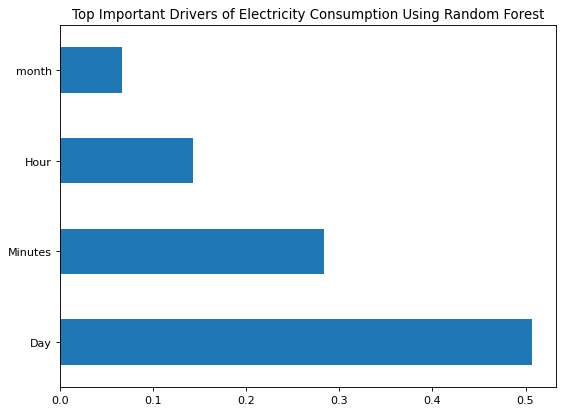

In [72]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electricity Consumption Using Random Forest")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled.columns)

feat_importances.nlargest(6).plot(kind='barh');


DECISION TREE REGRESSOR FOR FEATURE IMPORTANCE

month      0.067449
Hour       0.109451
Minutes    0.299039
Day        0.524061
dtype: float64


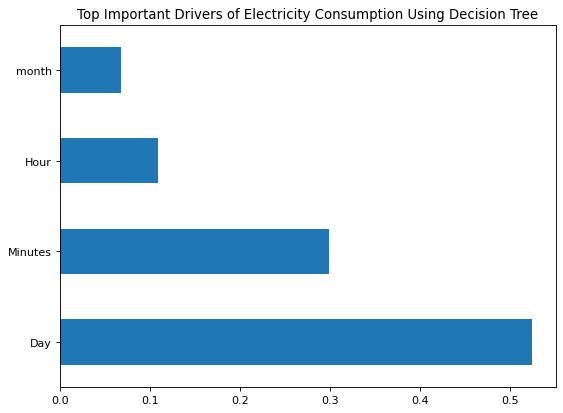

In [71]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Electricity Consumption Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled.columns)

feat_importances.nlargest(6).plot(kind='barh');

# MODEL BUILDING            

# LINEAR REGRESSOR

In [73]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LinearRegression
# 2. Create an instance of the estimator
linear_regression = LinearRegression()
# 3. Use trainning data to train the estimator
linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

In [74]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test))

test_mse1 = mean_squared_error(y_pred1, y_test)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -202.23775370627632
Test RMSE: 5.08


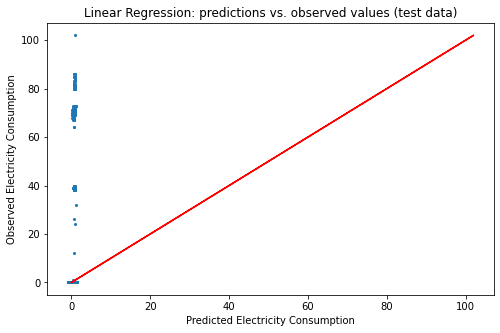

In [75]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

#  DECISION TREE MODEL

In [76]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test))

test_mse3 = mean_squared_error(y_pred3, y_test)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -21.96453509176915
Test RMSE: 4.97


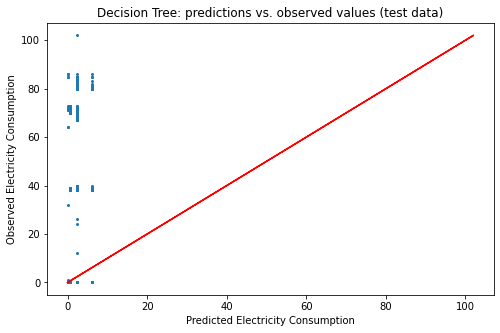

In [54]:
# Visualizing Decision Tree Regressor performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(dtree.predict(X_test_scaled), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Decision Tree: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

#  RANDOM FOREST MODEL

In [78]:
from sklearn.ensemble import RandomForestRegressor
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeRegressor
# 2. Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=3)

In [79]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test))

test_mse4 = mean_squared_error(y_pred4, y_test)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -21.840527155669495
Test RMSE: 4.97


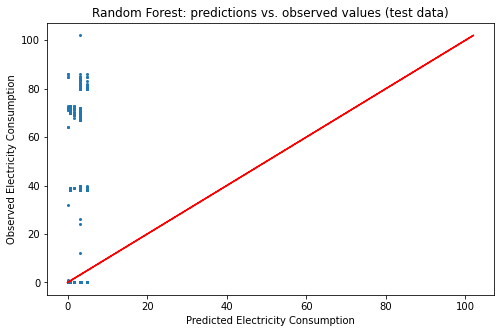

In [60]:
 #Visualizing random forest performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(rf.predict(X_test_scaled), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Random Forest: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

# K-NEAREST NEIGHBOUR

In [80]:
#Evaluate the Performance of our Predictive Model (K-Nearest Neighbour)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [81]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred2 = knn.predict(X_test_scaled) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test))

test_mse2 = mean_squared_error(y_pred2, y_test)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  0.9729339642161644
Test RMSE: 0.84


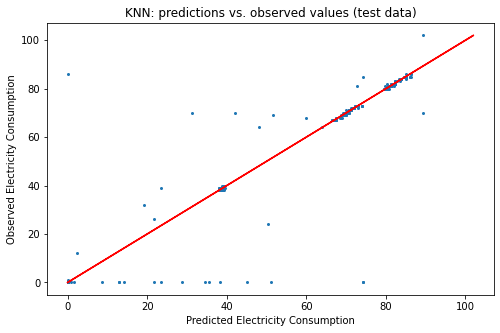

In [63]:
# Visualizing K-NN performance
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Electricity Consumption')
ax.set_ylabel('Observed Electricity Consumption');

In [64]:
# save the model to disk
model =KNeighborsRegressor()
filename = 'electricity_consumption_model.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [65]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KNeighborsRegressor()